In [0]:
#https://www.kaggle.com/mksaad/arabic-sentiment-analysis-in-tweets-nb-bow
#https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
import numpy as np 
import pandas as pd

In [0]:
import nltk
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import f_measure, precision, recall
import collections

In [0]:
pos_dataset = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv',sep='\t', encoding='utf-8').dropna()

In [0]:
neg_dataset = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding="utf-8").dropna()

In [5]:
neg_dataset.head

<bound method NDFrame.head of       Sentiment                                               Text
0           neg  اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1           neg  توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2           neg  #الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3           neg  نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4           neg                             الدودو جايه تكمل علي 💔
...         ...                                                ...
22509       neg  كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510       neg                                  احسدك على الايم 💔
22511       neg                            لأول مرة ما بنكون سوا 💔
22512       neg                                 بقله ليش يا واطي 🤔
22513       neg  قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...

[22514 rows x 2 columns]>

In [6]:
pos_dataset['Text'][1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [0]:
pos = pd.DataFrame(columns=['Text','Label'])

In [0]:
neg = pd.DataFrame(columns=['Text','Label'])

In [0]:
pos_tweets=[]
neg_tweets=[]
pos_sent=[]
neg_sent=[]
for i in range(len(pos_dataset)):
  pos_tweets.append(pos_dataset['Text'][i])
  pos_sent.append(1)

for i in range(len(neg_dataset)):
  neg_tweets.append(neg_dataset['Text'][i])
  neg_sent.append(0)

In [10]:
pos_tweets[1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [11]:
neg_tweets[1]

'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu'

In [0]:
text=[]
Label=[]
for tweet in pos_tweets:
  text.append(tweet)
  Label.append(1)
for tweet in neg_tweets:
  text.append(tweet)
  Label.append(0)

In [0]:
data = pd.DataFrame(columns=['Text','Labels'])

In [0]:
data['Text'] = text
data['Labels'] = Label

In [15]:
data

,Text,Labels
0,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,1
1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,1
2,من الخير نفسه 💛,1
3,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,1
4,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,1
...,...,...
45270,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...,0
45271,احسدك على الايم 💔,0
45272,لأول مرة ما بنكون سوا 💔,0
45273,بقله ليش يا واطي 🤔,0


### Arabic text cleaning

In [16]:
!pip install Tashaphyne
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stemming

In [0]:
# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

#### Normalizing Text

In [0]:
import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

#### Stop Words Removal

In [0]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

### Dealing with Hashtags in string

In [0]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

### MISC

In [0]:
def misc():
  import re
  import pyarabic.araby as araby

  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # test sample
  tweet1 = u'جهود تُبذل عامًا بعد عام تعبّر عن ترابط الجسد الواحد لخدمة ضيوف الرحمن؛ تطبيق ترجمان الفائز في #هاكاثون_الحج العام الماضي، ينطلق اليوم ليشارك الحجاج أيامهم الروحانية ويساعدهم في ترجمة اللوح الإرشادية في منطقة الحرم دون الحاجة إلى انترنت @reem. #حج_ذكي'



  # removes usernames inside a tweet text caused by to mentions or reply tweets
  def remove_usernames(input_txt, pattern):
      r = re.findall(pattern, input_txt)
      for i in r:
          input_txt = re.sub(i, '', input_txt)

      return input_txt

  # removes arabic letters tashkeel like (ِ ًٍ ٌ  ّ ْ )
  def remove_tashkeel(input_txt):
      return araby.strip_tashkeel(input_txt)

  # removes a decorative letter (ـ) which has no affect on words meaning
  def remove_tatweel(input_txt):
      return araby.strip_tatweel(input_txt)

  # normalizes the different forms of the letter hamza (ئ ؤ) into a single form (ء)
  def normalize_hamza(input_txt):
      r = re.findall(u'ئ',input_txt);
      e = re.findall(u'ؤ',input_txt);
      for i in r:
          input_txt= re.sub(i, u'ء', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ء', input_txt)
      return input_txt

  # normalizes the different forms of the letter alef (آ أ إ) into a single form (ا)
  def normalize_alef(input_txt):
      r = re.findall(u'أ',input_txt);
      e = re.findall(u'إ',input_txt);
      o = re.findall(u'آ', input_txt);
      for i in r:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in o:
          input_txt= re.sub(i, u'ا', input_txt)
      return input_txt

  # normalizes the different forms of the letter yeh (ي ى) into a single form (ى)
  def normalize_yeh(input_txt):
      r = re.findall(u'ي', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ى', input_txt)
      return input_txt

  # normalizes the different forms of the letter heh (ه ة) into a single form (ة)
  def normalize_heh(input_txt):
      r = re.findall(u'ه', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ة', input_txt)
      return input_txt

  # combining all preprocessing functions together for testing samples
  def full_preprocessing_steps(tweet):

      print("Tweet before preprocessing: " + tweet)

      usernames_free = remove_usernames(tweet,  "@[\w]*")
      tashkeel_free = remove_tashkeel(usernames_free)
      tatweel_free = remove_tatweel(tashkeel_free)
      hamza_normalized = normalize_hamza(tatweel_free)
      alef_normalized = normalize_alef(hamza_normalized)
      yeh_normalized = normalize_yeh(alef_normalized)
      heh_normalized = normalize_heh(yeh_normalized)

      print("Tweet after preprocessing: " + heh_normalized)

  full_preprocessing_steps(tweet1)

In [0]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    # text = clean_emoji(text)
    return text

#### Cleaning Data

In [0]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
   
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    # text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [0]:
data['Text'] = data['Text'].apply(lambda x:clean_text(x))

In [25]:
data['Text'][1]

'النهايه يبقيٰ معك احدالا رايٰ الجمال روحك اماالمنبهرون بالمظا…'

### Random Shuffling of data

In [26]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Labels
1762   شعبان اللهم بارك شعبان وبلغنا شهر رمضان بلوغا ...       1
2081   تختفي المفروض تناقش الاساس تبي اثبت جهلك كاهلا...       1
22104  ملاحظه محلها لابد ماتتكرر المباراه القادمه شكر...       1
16922  الساده العالم العربي احنا الشعب النايم الكسول ...       1
37022  حاجه رتويت حقيقي ✴️ وبشكل يومي لتغريداتك رتويت...       0
...                                                  ...     ...
901    احياها فكانما احيا الناس جميعا طفله عمرها بحاج...       1
42123  ينفع رمضان والله 😂💔 بدل اجلس اصب وغيري ياكل ويشرب       0
22586                             بلاك بينك منطقتك ابريل       1
35305                                              الخير       0
28873                              ياا رب الصصدااع يمووت       0

[45275 rows x 2 columns]>

In [27]:
data

,Text,Labels
1762,شعبان اللهم بارك شعبان وبلغنا شهر رمضان بلوغا ...,1
2081,تختفي المفروض تناقش الاساس تبي اثبت جهلك كاهلا...,1
22104,ملاحظه محلها لابد ماتتكرر المباراه القادمه شكر...,1
16922,الساده العالم العربي احنا الشعب النايم الكسول ...,1
37022,حاجه رتويت حقيقي ✴️ وبشكل يومي لتغريداتك رتويت...,0
...,...,...
901,احياها فكانما احيا الناس جميعا طفله عمرها بحاج...,1
42123,ينفع رمضان والله 😂💔 بدل اجلس اصب وغيري ياكل ويشرب,0
22586,بلاك بينك منطقتك ابريل,1
35305,الخير,0


#### Common Words Removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:12]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Rare words removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-50:]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [30]:
data

,Text,Labels
1762,شعبان بارك شعبان وبلغنا شهر رمضان بلوغا يغير ح...,1
2081,تختفي المفروض تناقش الاساس تبي اثبت جهلك كاهلا...,1
22104,ملاحظه محلها لابد ماتتكرر المباراه القادمه شكر...,1
16922,الساده العالم العربي احنا الشعب النايم الكسول ...,1
37022,حاجه حقيقي ✴️ وبشكل يومي لتغريداتك للتغريده ال...,0
...,...,...
901,احياها فكانما احيا الناس جميعا طفله عمرها بحاج...,1
42123,ينفع رمضان 😂💔 بدل اجلس اصب وغيري ياكل ويشرب,0
22586,بلاك بينك منطقتك ابريل,1
35305,,0


### Final Cleaning and Preparing Dataset

In [0]:
# def avg_word(sentence):
#     words = sentence.split()
#     if len(words) == 0:
#         return 0
#     return (sum(len(word) for word in words)/len(words))

# data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
# data['char_count'] = data['Text'].str.len() ## this also includes spaces
# data['avg_char_per_word'] = data['Text'].apply(lambda x: avg_word(x))
# stop = stopwords.words('arabic')
# data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
# data = data.sort_values(by='word_count',ascending=[0])
# final = []
# for index, row in data.iterrows():
#     if len(row['Text'].split()) > 3:
#         final.append([row['Text'],row['Labels']])
# df = pd.DataFrame(final)
# df.columns = ['Text','Sentiment']
# df.to_csv('final_data.csv',index=False)

In [32]:
data = data.dropna()
data

,Text,Labels
1762,شعبان بارك شعبان وبلغنا شهر رمضان بلوغا يغير ح...,1
2081,تختفي المفروض تناقش الاساس تبي اثبت جهلك كاهلا...,1
22104,ملاحظه محلها لابد ماتتكرر المباراه القادمه شكر...,1
16922,الساده العالم العربي احنا الشعب النايم الكسول ...,1
37022,حاجه حقيقي ✴️ وبشكل يومي لتغريداتك للتغريده ال...,0
...,...,...
901,احياها فكانما احيا الناس جميعا طفله عمرها بحاج...,1
42123,ينفع رمضان 😂💔 بدل اجلس اصب وغيري ياكل ويشرب,0
22586,بلاك بينك منطقتك ابريل,1
35305,,0


In [33]:
from sklearn.model_selection import train_test_split
data.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(data['Text'],data['Labels'], test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(40747,) (40747,)
(4528,) (4528,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
stop_words = pd.Series(stopwords.words('arabic'))
stop_words = stop_words.apply(lambda x: x.encode('utf-8'))

In [0]:
vectorizer = TfidfVectorizer( use_idf =True,
	stop_words = stop_words.tolist(), analyzer='word', lowercase=False, sublinear_tf=True)


In [37]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=[b'\xd8\xa5\xd8\xb0', b'\xd8\xa5\xd8\xb0\xd8\xa7',
                            b'\xd8\xa5\xd8\xb0\xd9\x85\xd8\xa7',
                            b'\xd8\xa...
                            b'\xd8\xa5\xd9\x84\xd9\x8a\xd9\x83\xd9\x85',
                            b'\xd8\xa5\xd9\x84\xd9\x8a\xd9\x83\xd9\x85\xd8\xa7',
                            b'\xd8\xa5\xd9\x84\xd9\x8a\xd9\x83\xd9\x86',
                            b'\xd8\xa3\xd9\x85', b'\xd8\xa3\xd9\x85\xd8\xa7',
                            b'\xd8\xa3\xd9\x85\xd8\xa7',
                            b'\xd8\xa5\xd9\x85\xd8\xa7', b'\xd8\xa3\xd9\x86', ...],
                strip_accents=None, sublinear

In [0]:
X_Train_tfidf = vectorizer.fit_transform(X_train.values.ravel())
X_Test_tfidf = vectorizer.transform(X_test.values.ravel())

In [39]:
X_Train_tfidf.shape

(40747, 59116)

In [40]:
X_Train_tfidf[1]

<1x59116 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_Train_tfidf, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
Y_Pred = nb.predict(X_Test_tfidf)

In [43]:
Y_Pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
print("Naive Bayes Accuracy: ")
print(float(np.sum(Y_test.values == Y_Pred)) / len(Y_Pred))

Naive Bayes Accuracy: 
0.7833480565371025


In [0]:
probabilities = pd.DataFrame(nb.predict_proba(X_Test_tfidf), columns=nb.classes_)
probabilities.to_csv("nb_probabilities.csv", index=False)

In [46]:
probabilities

,0,1
0,0.905153,0.094847
1,0.707130,0.292870
2,0.905160,0.094840
3,0.576293,0.423707
4,0.711792,0.288208
...,...,...
4523,0.984610,0.015390
4524,0.634674,0.365326
4525,0.977971,0.022029
4526,0.652097,0.347903


In [0]:
def predictor(arr):
  text = vectorizer.transform(arr)
  prediction = nb.predict(text)
  return prediction

In [48]:
predictor(['الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…'])

array([1])

In [0]:
from sklearn.metrics import confusion_matrix

def c_m(y_true, y_pred):
  print(confusion_matrix(y_true, y_pred))

In [50]:
c_m(Y_test,Y_Pred)

[[1768  490]
 [ 491 1779]]


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [0]:
decision_tree = decision_tree.fit( X_Train_tfidf,Y_train )

In [0]:
text = vectorizer.transform(['الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…'])

In [55]:
decision_tree.predict(text)

array([1])

In [0]:
dt_predict = decision_tree.predict(X_Test_tfidf)

In [57]:
print("Decision Tree Accuracy: ")
print(float(np.sum(Y_test.values == dt_predict)) / len(dt_predict))

Decision Tree Accuracy: 
0.7555212014134276


### SGD

In [58]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_Train_tfidf, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
sgd_predict = sgd.predict(X_Test_tfidf)

In [60]:
print("SGD Accuracy: ")
print(float(np.sum(Y_test.values == sgd_predict)) / len(sgd_predict))

SGD Accuracy: 
0.7670053003533569


In [61]:
c_m(Y_test,sgd_predict)

[[1921  337]
 [ 718 1552]]


In [0]:
x_train = X_Train_tfidf
x_test = X_Test_tfidf
y_train = Y_train
y_test = Y_test

### XGBoost

In [63]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(max_depth = 3, learning_rate = 0.01, n_estimators = 300)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
xgb_classifier.score(x_test, y_test)

0.5772968197879859

### ADABoost

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
ADA = AdaBoostClassifier(n_estimators = 100 , random_state=42)
scores = cross_val_score(ADA, x_train, y_train, cv=5)
#print(scores.mean())
ADA.fit(x_train, y_train)
ADA.score(x_test, y_test)

0.6356007067137809

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1

Using TensorFlow backend.


In [67]:
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1891744   
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [70]:
history = model.fit(x_train, y_train, batch_size=100, epochs=25, validation_split=0.1)




Train on 36672 samples, validate on 4075 samples
Epoch 1/25





36672/36672 [==============================] - 34s 939us/step - loss: 0.6341 - acc: 0.6227 - val_loss: 0.5061 - val_acc: 0.7632
Epoch 2/25
36672/36672 [==============================] - 34s 922us/step - loss: 0.4738 - acc: 0.7627 - val_loss: 0.4583 - val_acc: 0.7681
Epoch 3/25
36672/36672 [==============================] - 34s 927us/step - loss: 0.3844 - acc: 0.8166 - val_loss: 0.4691 - val_acc: 0.7683
Epoch 4/25
36672/36672 [==============================] - 34s 936us/step - loss: 0.3399 - acc: 0.8354 - val_loss: 0.4961 - val_acc: 0.7708
Epoch 5/25
36672/36672 [==============================] - 34s 932us/step - loss: 0.3109 - acc: 0.8457 - val_loss: 0.5454 - val_acc: 0.7713
Epoch 6/25
36672/36672 [==============================] - 34s 931us/step - loss: 0.2957 - acc: 0.8532 - val_loss: 0.6143 - val_acc: 0.7644
Epoch 7/25
36672/36672 [==============================] - 35s 948us/step - loss: 0.2852 - acc: 0.8539 - val_l

In [71]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

4528/4528 [==============================] - 2s 396us/step
Test score: 1.2431090360395478
Test accuracy: 0.7681095404254252


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


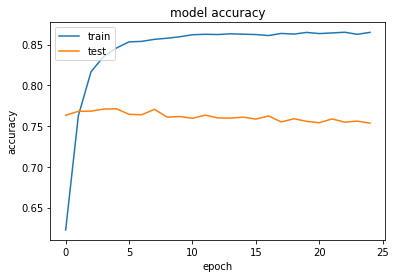

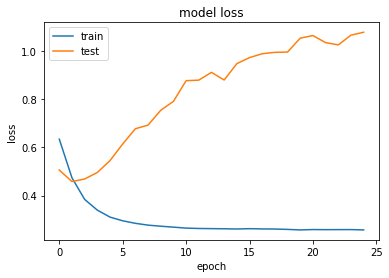

In [72]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(x_train, y_train)
lr.score(x_test, y_test)

0.782243816254417